In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
circuits = pd.read_csv("data_raw/circuits.csv")
results = pd.read_csv("data_raw/results.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
races = pd.read_csv("data_raw/races.csv")

In [15]:
races2 = (races.query("year >= 2013"))

In [16]:
constructors_merge = pd.merge(results[['raceId', 'driverId', 'constructorId','points']],
                       constructors[["constructorId","constructorRef", "name"]],
                       on = "constructorId",
                       how = "left")

constructors_merge

,raceId,driverId,constructorId,points,constructorRef,name
0,18,1,1,10.0,mclaren,McLaren
1,18,2,2,8.0,bmw_sauber,BMW Sauber
2,18,3,3,6.0,williams,Williams
3,18,4,4,5.0,renault,Renault
4,18,5,1,4.0,mclaren,McLaren
...,...,...,...,...,...,...
25835,1096,854,210,0.0,haas,Haas F1 Team
25836,1096,825,210,0.0,haas,Haas F1 Team
25837,1096,1,131,0.0,mercedes,Mercedes
25838,1096,849,3,0.0,williams,Williams


In [17]:
races_merge = pd.merge(constructors_merge[['raceId', 'constructorId','points','constructorRef','name']],
                       races2[["raceId","circuitId","name","year"]],
                       on = "raceId",
                       how = "left")

main_data = races_merge.rename(columns = {"name_x":"name_brand",
                                          "name_y":"name_circuit"})
main_data


,raceId,constructorId,points,constructorRef,name_brand,circuitId,name_circuit,year
0,18,1,10.0,mclaren,McLaren,NaN,NaN,NaN
1,18,2,8.0,bmw_sauber,BMW Sauber,NaN,NaN,NaN
2,18,3,6.0,williams,Williams,NaN,NaN,NaN
3,18,4,5.0,renault,Renault,NaN,NaN,NaN
4,18,1,4.0,mclaren,McLaren,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
25835,1096,210,0.0,haas,Haas F1 Team,24.0,Abu Dhabi Grand Prix,2022.0
25836,1096,210,0.0,haas,Haas F1 Team,24.0,Abu Dhabi Grand Prix,2022.0
25837,1096,131,0.0,mercedes,Mercedes,24.0,Abu Dhabi Grand Prix,2022.0
25838,1096,3,0.0,williams,Williams,24.0,Abu Dhabi Grand Prix,2022.0


In [18]:

teamrace_agg = (main_data2.groupby(["constructorId","name_circuit"])
                        .agg(mean_points = ('points','mean')))
teamrace_agg






NameError: name 'main_data2' is not defined

In [ ]:
teamrace_agg.groupby('constructorId').apply(lambda mean_points : mean_points.sort_values(by = 'mean_points', ascending = False).head(5).reset_index(drop = True))

mean_points
constructorId               
1             0       8.0000
              1       6.5000
              2       5.7500
              3       5.2500
              4       5.0625
...                      ...
214           0      12.5000
              1      10.7500
              2       9.0000
              3       7.0000
              4       5.0000

[85 rows x 1 columns]

In [ ]:
maxofmean_points=(teamrace_agg.groupby(["constructorId"])
 .agg(max_points=('mean_points','max')))


maxofmean_points




,max_points
constructorId,
1,8.000000
3,5.666667
4,14.000000
5,4.000000
6,16.500000
9,20.000000
10,8.500000
15,2.250000
51,6.000000


In [ ]:
teamrace_agg.query("mean_points >= 10")

mean_points
constructorId name_circuit                         
4             Sakhir Grand Prix           14.000000
6             Abu Dhabi Grand Prix        10.375000
              Australian Grand Prix       12.916667
              Austrian Grand Prix         11.000000
              Bahrain Grand Prix          11.937500
...                                             ...
131           United States Grand Prix    17.500000
211           Sakhir Grand Prix           20.000000
              Turkish Grand Prix          10.000000
214           Hungarian Grand Prix        10.750000
              Qatar Grand Prix            12.500000

[83 rows x 1 columns]

In [ ]:


top5_mean_points_constructors = (teamrace_agg.groupby('constructorId').apply(lambda x: x.sort_values(by='mean_points', ascending=False).head(5)).reset_index(drop=True))

top5_mean_points_constructors



,mean_points
0,8.0000
1,6.5000
2,5.7500
3,5.2500
4,5.0625
...,...
80,12.5000
81,10.7500
82,9.0000
83,7.0000


In [ ]:
bottom5_mean_points_constructors = (teamrace_agg.groupby('constructorId').apply(lambda x: x.sort_values(by='mean_points', ascending=False).tail(5)).reset_index(drop=True))

bottom5_mean_points_constructors


,mean_points
0,0.50
1,0.50
2,0.00
3,0.00
4,0.00
...,...
80,1.25
81,1.00
82,0.75
83,0.50


In [ ]:
teamrace_agg.query("mean_points >= 10")

mean_points
constructorId name_circuit                         
4             Sakhir Grand Prix           14.000000
6             Abu Dhabi Grand Prix        10.375000
              Australian Grand Prix       12.916667
              Austrian Grand Prix         11.000000
              Bahrain Grand Prix          11.937500
...                                             ...
131           United States Grand Prix    17.500000
211           Sakhir Grand Prix           20.000000
              Turkish Grand Prix          10.000000
214           Hungarian Grand Prix        10.750000
              Qatar Grand Prix            12.500000

[83 rows x 1 columns]

In [ ]:



results["fastestLapSpeed"].str.isnumeric()
subset = results.query("fastestLapSpeed.str.isnumeric() == False")




NameError: name 'Results' is not defined

In [ ]:
avg_speed_of_race=(Results.groupby("raceId")
.agg(mean_max_speed=('fastestLapSpeed','mean')))




TypeError: Could not convert 216.891214.344214.706215.920215.199217.668213.950212.537214.640216.245214.491215.695216.596216.970215.744214.164210.943212.301\N214.455 to numeric

In [ ]:
main_data2 = (main_data.query("year >= 2013"))
main_data2

,raceId,constructorId,points,constructorRef,name_brand,circuitId,name_circuit,year
21709,880,208,25.0,lotus_f1,Lotus F1,1.0,Australian Grand Prix,2013.0
21710,880,6,18.0,ferrari,Ferrari,1.0,Australian Grand Prix,2013.0
21711,880,9,15.0,red_bull,Red Bull,1.0,Australian Grand Prix,2013.0
21712,880,6,12.0,ferrari,Ferrari,1.0,Australian Grand Prix,2013.0
21713,880,131,10.0,mercedes,Mercedes,1.0,Australian Grand Prix,2013.0
...,...,...,...,...,...,...,...,...
25835,1096,210,0.0,haas,Haas F1 Team,24.0,Abu Dhabi Grand Prix,2022.0
25836,1096,210,0.0,haas,Haas F1 Team,24.0,Abu Dhabi Grand Prix,2022.0
25837,1096,131,0.0,mercedes,Mercedes,24.0,Abu Dhabi Grand Prix,2022.0
25838,1096,3,0.0,williams,Williams,24.0,Abu Dhabi Grand Prix,2022.0


In [ ]:
circuits_details=pd.read_csv("data_raw/circuits_details1.csv")

circuits_details


circuits_merge = pd.merge(circuits_details[['location', 'length', 'turns']],
                       circuits[["name","location"]],
                       on = "location",
                       how = "left")

circuits_merge_2 = circuits_merge.rename(columns = {"name":"name_circuit"})



circuits_merge_2


turns_ranked=circuits_merge_2.sort_values(by = "turns", ascending = False)

length_ranked=circuits_merge_2.sort_values(by = "length", ascending = False)


turns_ranked

,location,length,turns,name_circuit
20,Jeddah,6.174,27,Jeddah Corniche Circuit
24,Marina Bay,4.940,23,Marina Bay Street Circuit
8,Baku,6.003,20,Baku City Circuit
12,Spa,7.004,20,Circuit de Spa-Francorchamps
14,Austin,5.513,20,Circuit of the Americas
11,Monte-Carlo,3.337,19,Circuit de Monaco
32,Suzuka,5.807,18,Suzuka Circuit
30,Silverstone,5.891,18,Silverstone Circuit
25,Miami,5.412,18,Miami International Autodrome
21,Yeongam County,5.615,18,Korean International Circuit


In [ ]:
top5_mean_points_constructors_with_turns_and_length=pd.merge(top5_mean_points_constructors[['constructorId', 'name_circuit', 'mean_points']],
                       circuits_merge_2[["length","turns","name_circuit"]],
                       on = "name_circuit",
                       how = "left")

top5_mean_points_constructors_with_turns_and_length

KeyError: "['constructorId', 'name_circuit'] not in index"

In [ ]:
circuits = pd.read_csv("data_raw/circuits.csv")

circuits

races= pd.read_csv("data_raw/races.csv")

races


races_post_2015 = (races.query("year >= 2015"))
races_post_2015


races_with_circuits=pd.merge(circuits[['circuitId', 'name', 'location']],
                       races_post_2015[["year","circuitId","raceId"]],
                       on = "circuitId",
                       how = "left")

results_with_circuits_merge = pd.merge(Results[['raceId','constructorId','points']],
                       races_with_circuits[["circuitId","name", "location","raceId"]],
                       on = "raceId",
                       how = "left")

In [ ]:
results_with_circuits_merge

,raceId,constructorId,points,circuitId,name,location
0,18,1,10.0,NaN,NaN,NaN
1,18,2,8.0,NaN,NaN,NaN
2,18,3,6.0,NaN,NaN,NaN
3,18,4,5.0,NaN,NaN,NaN
4,18,1,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...
25835,1096,210,0.0,24.0,Yas Marina Circuit,Abu Dhabi
25836,1096,210,0.0,24.0,Yas Marina Circuit,Abu Dhabi
25837,1096,131,0.0,24.0,Yas Marina Circuit,Abu Dhabi
25838,1096,3,0.0,24.0,Yas Marina Circuit,Abu Dhabi


In [ ]:
constructor_agg = (results_with_circuits_merge.groupby(["constructorId","name"])
                        .agg(mean_points = ('points','mean')))
constructor_agg



mean_points
constructorId name                                             
1             Albert Park Grand Prix Circuit           2.500000
              Autodromo Enzo e Dino Ferrari            8.000000
              Autodromo Internazionale del Mugello     4.000000
              Autodromo Nazionale di Monza             5.062500
              Autódromo Hermanos Rodríguez             1.000000
...                                                         ...
214           Red Bull Ring                            2.333333
              Silverstone Circuit                      4.500000
              Sochi Autodrom                           4.000000
              Suzuka Circuit                           9.000000
              Yas Marina Circuit                       3.000000

[455 rows x 1 columns]

In [ ]:

constructor_circuit_agg = (results_with_circuits_merge.groupby(["constructorId", "name"])
                           .agg(mean_points=('points', 'mean')))

constructor_circuit_agg = constructor_circuit_agg.reset_index()

top5_mean_points_constructors = (constructor_circuit_agg.groupby('constructorId')
                                 .apply(lambda x: x.sort_values(by='mean_points', ascending=False)
                                        .head(5)).reset_index(drop=True))
top5_mean_points_constructors



top5_mean_points_constructors_with_turns_and_length=pd.merge(top5_mean_points_constructors[['constructorId', 'name', 'mean_points']],
                       circuits_merge[["length","turns","name"]],
                       on = "name",
                       how = "left")



top5_mean_points_constructors_with_turns_and_length_and_altitude=pd.merge(top5_mean_points_constructors_with_turns_and_length[['constructorId', 'name', 'mean_points',"length","turns"]],
                       circuits[["name","alt"]],
                       on = "name",
                       how = "left")

top5_mean_points_constructors_with_turns_and_length_and_altitude

,constructorId,name,mean_points,length,turns,alt
0,1,Autodromo Enzo e Dino Ferrari,8.0000,4.909,17,37
1,1,Istanbul Park,5.2500,5.338,14,130
2,1,Red Bull Ring,5.1000,4.318,10,678
3,1,Autodromo Nazionale di Monza,5.0625,5.793,11,162
4,1,Autódromo Internacional do Algarve,5.0000,4.653,15,108
...,...,...,...,...,...,...
80,214,Losail International Circuit,12.5000,5.419,16,\N
81,214,Hungaroring,10.7500,4.381,14,264
82,214,Suzuka Circuit,9.0000,5.807,18,45
83,214,Autódromo Internacional do Algarve,5.0000,4.653,15,108


In [ ]:
speed=pd.merge(Results[['raceId', 'fastestLapSpeed']],
                       races_post_2015[["year","circuitId","raceId"]],
                       on = "raceId",
                       how = "left")

speed2 = (speed.query("year >= 2015"))

speed2

,raceId,fastestLapSpeed,year,circuitId
22534,926,209.915,2015.0,1.0
22535,926,209.577,2015.0,1.0
22536,926,208.740,2015.0,1.0
22537,926,208.144,2015.0,1.0
22538,926,206.137,2015.0,1.0
...,...,...,...,...
25835,1096,211.632,2022.0,24.0
25836,1096,208.556,2022.0,24.0
25837,1096,211.738,2022.0,24.0
25838,1096,210.517,2022.0,24.0


In [ ]:

speed2['fastestLapSpeed'] = pd.to_numeric(speed2['fastestLapSpeed'])

average_top_speed = (speed2.groupby(["circuitId"])
                    .agg(mean_fastestLapSpeed=('fastestLapSpeed', 'mean')))

average_top_speed




/var/folders/53/290jbn891839qvq7v06czdmm0000gn/T/ipykernel_74638/1431563219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed2['fastestLapSpeed'] = pd.to_numeric(speed2['fastestLapSpeed'])


,mean_fastestLapSpeed
circuitId,
1.0,216.064593
2.0,199.564220
3.0,205.524304
4.0,198.002690
5.0,198.905300
6.0,154.259525
7.0,204.463576
9.0,227.204533
10.0,207.771820


In [ ]:
average_top_speed.reset_index(inplace=True)


speed_with_names = pd.merge(average_top_speed[['circuitId', 'mean_fastestLapSpeed']],
                            circuits[['circuitId', 'name']],
                            on='circuitId',
                            how='left')

speed_with_names


,circuitId,mean_fastestLapSpeed,name
0,1.0,216.064593,Albert Park Grand Prix Circuit
1,2.0,199.564220,Sepang International Circuit
2,3.0,205.524304,Bahrain International Circuit
3,4.0,198.002690,Circuit de Barcelona-Catalunya
4,5.0,198.905300,Istanbul Park
5,6.0,154.259525,Circuit de Monaco
6,7.0,204.463576,Circuit Gilles Villeneuve
7,9.0,227.204533,Silverstone Circuit
8,10.0,207.771820,Hockenheimring
9,11.0,190.566740,Hungaroring


In [ ]:
everything=pd.merge(top5_mean_points_constructors_with_turns_and_length_and_altitude[['constructorId', 'name', 'mean_points',"length","turns","alt"]],
                       speed_with_names[["name","mean_fastestLapSpeed"]],
                       on = "name",
                       how = "left")

everything

,constructorId,name,mean_points,length,turns,alt,mean_fastestLapSpeed
0,1,Autodromo Enzo e Dino Ferrari,8.0000,4.909,17,37,221.776810
1,1,Istanbul Park,5.2500,5.338,14,130,198.905300
2,1,Red Bull Ring,5.1000,4.318,10,678,223.978021
3,1,Autodromo Nazionale di Monza,5.0625,5.793,11,162,243.537459
4,1,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308
...,...,...,...,...,...,...,...
80,214,Losail International Circuit,12.5000,5.419,16,\N,223.531400
81,214,Hungaroring,10.7500,4.381,14,264,190.566740
82,214,Suzuka Circuit,9.0000,5.807,18,45,214.596731
83,214,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308


In [ ]:
everything_with_constructors = pd.merge(everything[['constructorId','name','mean_points','length','turns','alt','mean_fastestLapSpeed']],
                            constructors[['constructorId', 'name']],
                            on='constructorId',
                            how='left')



everything_with_constructors2 = everything_with_constructors.rename(columns = {"name_x":"Circuit",
                                                                  "name_y":"Brand"})

everything_with_constructors2


,constructorId,Circuit,mean_points,length,turns,alt,mean_fastestLapSpeed,Brand
0,1,Autodromo Enzo e Dino Ferrari,8.0000,4.909,17,37,221.776810,McLaren
1,1,Istanbul Park,5.2500,5.338,14,130,198.905300,McLaren
2,1,Red Bull Ring,5.1000,4.318,10,678,223.978021,McLaren
3,1,Autodromo Nazionale di Monza,5.0625,5.793,11,162,243.537459,McLaren
4,1,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308,McLaren
...,...,...,...,...,...,...,...,...
80,214,Losail International Circuit,12.5000,5.419,16,\N,223.531400,Alpine F1 Team
81,214,Hungaroring,10.7500,4.381,14,264,190.566740,Alpine F1 Team
82,214,Suzuka Circuit,9.0000,5.807,18,45,214.596731,Alpine F1 Team
83,214,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308,Alpine F1 Team


In [ ]:
constructors=pd.read_csv("data_raw/constructors.csv")
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [ ]:




constructor_turns_agg = (everything_with_constructors2.groupby(["Brand"])
                           .agg(mean_turns=('turns', 'mean')))


constructor_points_agg = (everything_with_constructors2.groupby(["Brand"])
                           .agg(mean_points=('mean_points', 'mean')))

constructor_turns_agg



,mean_turns
Brand,
Alfa Romeo,15.8
AlphaTauri,15.6
Alpine F1 Team,15.6
Aston Martin,19.2
Ferrari,17.2
Force India,16.8
Haas F1 Team,15.4
Lotus F1,15.2
Manor Marussia,15.0


In [ ]:
constructor_points_agg

,mean_points
Brand,
Alfa Romeo,2.733333
AlphaTauri,5.050000
Alpine F1 Team,8.450000
Aston Martin,4.950000
Ferrari,13.823333
Force India,5.708333
Haas F1 Team,2.106905
Lotus F1,4.400000
Manor Marussia,0.050000


In [ ]:
constructor_turns_agg.reset_index(inplace=True)


mean_points_turns = pd.merge(constructor_turns_agg[['Brand','mean_turns']],
                            constructor_points_agg[['Brand', 'mean_points']],
                            on='Brand',
                            how='left')

mean_points_turns.sort_values(by = "mean_points", ascending = False)


,Brand,mean_turns,mean_points
10,Mercedes,15.6,19.711905
12,Red Bull,15.6,16.041667
4,Ferrari,17.2,13.823333
2,Alpine F1 Team,15.6,8.450000
11,Racing Point,14.2,7.266667
13,Renault,15.8,5.750000
5,Force India,16.8,5.708333
9,McLaren,13.4,5.682500
1,AlphaTauri,15.6,5.050000
3,Aston Martin,19.2,4.950000


In [ ]:
mean_points_turns_groups = mean_points_turns.groupby('Brand')

fig, ax = plt.subplots()
ax.margins(0.25) 
for name, group in mean_points_turns_groups:
    ax.plot(group.mean_turns, group.mean_points, marker='o', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("turns")
plt.ylabel("points")
plt.show()

NameError: name 'mean_points_turns' is not defined

In [ ]:
constructor_points_agg


constructor_speed_agg = (everything_with_constructors2.groupby(["Brand"])
                           .agg(mean_fastestLapSpeedsbyBrand=('mean_fastestLapSpeed', 'mean')))

constructor_speed_agg.reset_index(inplace=True)


mean_points_speed = pd.merge(constructor_speed_agg[['Brand','mean_fastestLapSpeedsbyBrand']],
                            constructor_points_agg[['Brand', 'mean_points']],
                            on='Brand',
                            how='left')




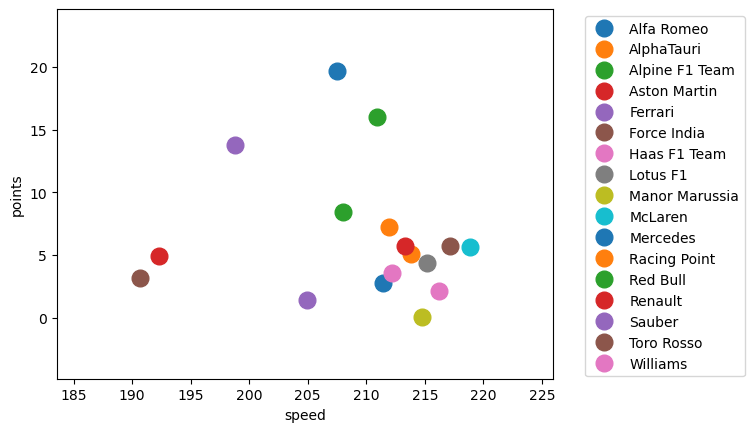

In [ ]:
mean_points_speeds_groups = mean_points_speed.groupby('Brand')

fig, ax = plt.subplots()
ax.margins(0.25) 
for name, group in mean_points_speeds_groups:
    ax.plot(group.mean_fastestLapSpeedsbyBrand, group.mean_points, marker='o', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("speed")
plt.ylabel("points")
plt.show()